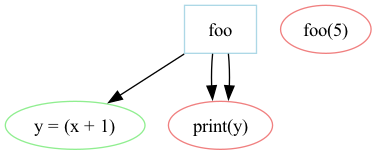

In [6]:
import ast
import astor
import pydot
from IPython.display import Image, display

class GraphVisitor(ast.NodeVisitor):
    def __init__(self):
        self.graph = pydot.Dot(graph_type='digraph')
        self.current_function = None

    def visit_FunctionDef(self, node):
        func_node = pydot.Node(node.name, shape='box', color='lightblue')
        self.graph.add_node(func_node)
        self.current_function = func_node
        self.generic_visit(node)
        self.current_function = None

    def visit_Assign(self, node):
        targets = [astor.to_source(t).strip() for t in node.targets]
        value = astor.to_source(node.value).strip()
        assign_node = pydot.Node(f"{' = '.join(targets)} = {value}", shape='ellipse', color='lightgreen')
        self.graph.add_node(assign_node)
        if self.current_function:
            self.graph.add_edge(pydot.Edge(self.current_function, assign_node))
        self.generic_visit(node)

    def visit_Expr(self, node):
        expr_node = pydot.Node(astor.to_source(node).strip(), shape='ellipse', color='lightyellow')
        self.graph.add_node(expr_node)
        if self.current_function:
            self.graph.add_edge(pydot.Edge(self.current_function, expr_node))
        self.generic_visit(node)

    def visit_Call(self, node):
        func = astor.to_source(node.func).strip()
        args = [astor.to_source(a).strip() for a in node.args]
        call_node = pydot.Node(f"{func}({', '.join(args)})", shape='ellipse', color='lightcoral')
        self.graph.add_node(call_node)
        if self.current_function:
            self.graph.add_edge(pydot.Edge(self.current_function, call_node))
        self.generic_visit(node)

def generate_graph(source_code):
    tree = ast.parse(source_code)
    visitor = GraphVisitor()
    visitor.visit(tree)
    return visitor.graph

source_code = """
def foo(x):
    y = x + 1
    print(y)
foo(5)
"""

graph = generate_graph(source_code)
graph.write_png('graph.png')
display(Image('graph.png'))
